## BoomBikes
### Bike Sharing Assignment

* Identify Best Features to Identify the demand for shared bikes
* How well this features can be used to predict the bike demands


#### Import Libraries and Read the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Performing Exploratory Data Analysis using data dictionary element sheet, Data Validations and Clean the Data

In [3]:
## Check the data consistency (Null Values and datatypes)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
## Identifying the Categorical Variables using Data Dictionary and Imputing the data

bikes['season'] = bikes[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4 : 'winter'}))

bikes['mnth'] = bikes[['mnth']].apply(lambda x: x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4 : 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}))

bikes['weekday'] = bikes[['weekday']].apply(lambda x: x.map({0 : 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}))

bikes['weathersit'] = bikes[['weathersit']].apply(lambda x: x.map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Shower', 4: 'Heavy Shower'}))

bikes['yr'] = bikes[['yr']].apply(lambda x: x.map({0:2018,1:2019}))

bikes['workingday'] = bikes[['workingday']].apply(lambda x: x.map({0:'Non-Working Day',1:'Working Day'}))

bikes['holiday'] = bikes[['holiday']].apply(lambda x: x.map({0:'Non-Holiday',1:'Holiday'}))

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,Non-Holiday,Sun,Non-Working Day,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,Non-Holiday,Mon,Non-Working Day,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,Non-Holiday,Tue,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,Non-Holiday,Wed,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,Non-Holiday,Thr,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## Identifying the unnecessary columns using data-dictionary and data overview

## instant --just the serial no field. it is not required 
bikes = bikes.drop('instant', axis=1)
## dteday ---yr mnth day details already present hence complete date not required 
bikes = bikes.drop('dteday', axis=1)
## casual, registered ---this count is already part of cnt column as per data dictionary. it won't be required
bikes = bikes.drop(['casual','registered'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Non-Holiday,Sun,Non-Working Day,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Non-Holiday,Mon,Non-Working Day,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Non-Holiday,Tue,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Non-Holiday,Wed,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Non-Holiday,Thr,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='atemp', ylabel='temp'>

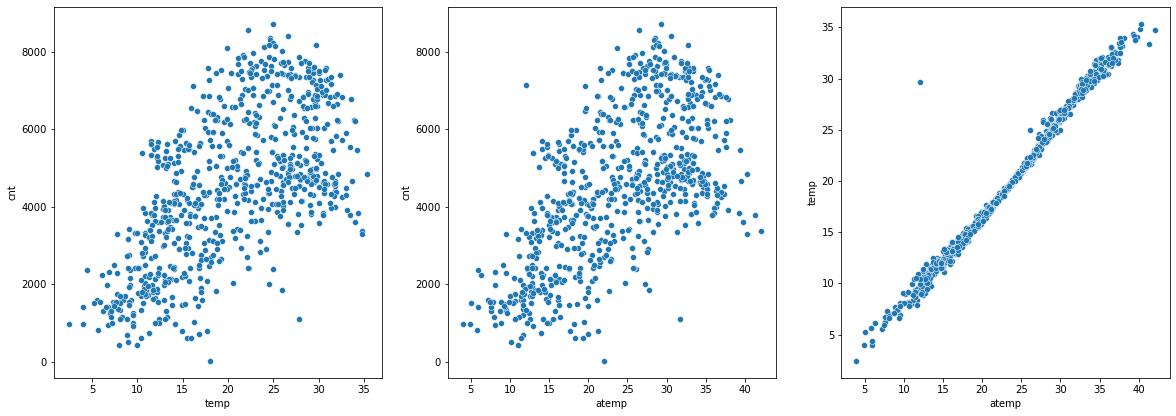

In [6]:
## Check correlation between atemp and temp and drop one column to avoid multi-collinearity

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.scatterplot(x = 'atemp', y = 'temp', data = bikes)

In [7]:
## Drop temp column as the correlation between atemp and temp is very high 


bikes = bikes.drop('temp',axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Non-Holiday,Sun,Non-Working Day,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Non-Holiday,Mon,Non-Working Day,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Non-Holiday,Tue,Working Day,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Non-Holiday,Wed,Working Day,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Non-Holiday,Thr,Working Day,Clear,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='workingday', ylabel='holiday'>

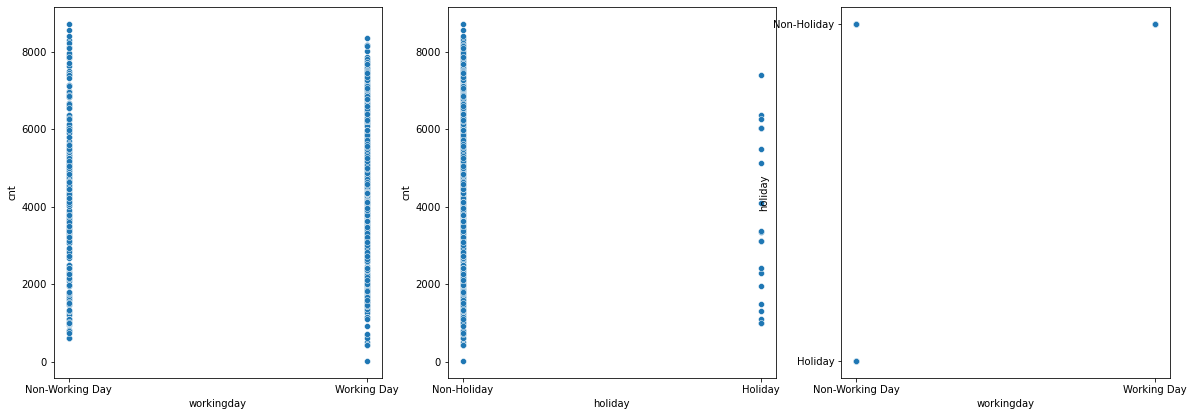

In [8]:
## Check correlation between working day and holiday and drop one column to avoid multi-collinearity

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.scatterplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.scatterplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.scatterplot(x = 'workingday', y = 'holiday', data = bikes)

> Looking at above graph, it shows that both columns are not having collinearity and are not related to each other. hence keeping both the columns

<Figure size 1440x720 with 0 Axes>

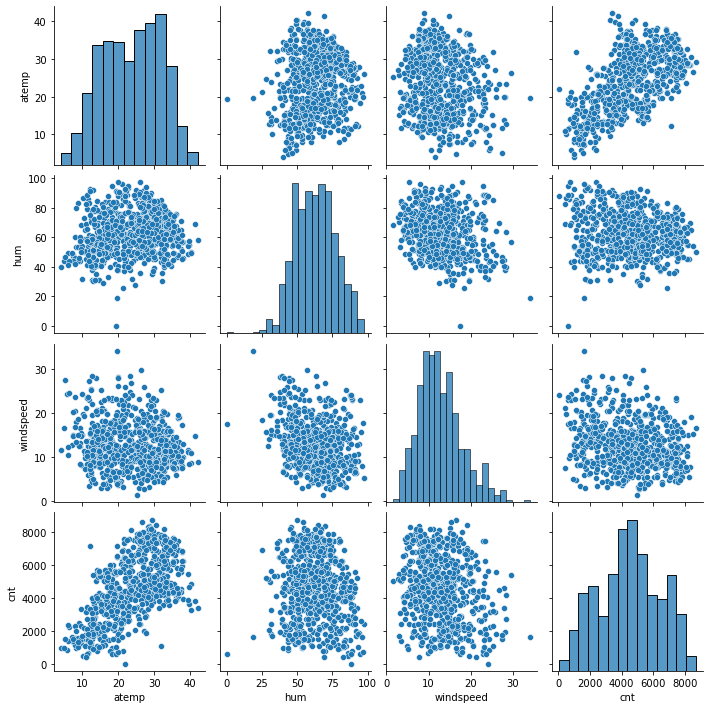

In [9]:
### Visualizing the Data

## Identify the correlation between numerical columns
numerical_cols = ['atemp','hum','windspeed','cnt']
plt.figure(figsize=(20,10))
sns.pairplot(bikes[numerical_cols])

   > As seen above,  <b>aTemp</b> variable is seen to be more related with the <b>target variable Cnt</b>
   

In [10]:
### Function for univariate analysis

def univariateAnalysis(column,title="", x_label="",y_label="Count"):
    print(bikes[[column,'cnt']].groupby(by=column).sum().sort_values(by='cnt', ascending=False))
    ax = sns.barplot(column, 'cnt',data=bikes).set_title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

            cnt
season         
fall    1061129
summer   918589
winter   841613
spring   469514


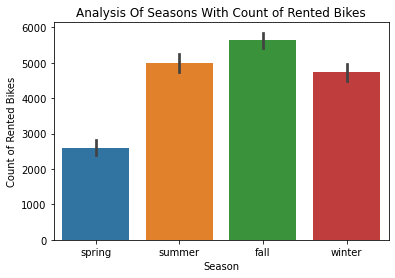

In [11]:
#### Identifying the relation between categorical variables and target variables 

## Season Analysis
univariateAnalysis('season','Analysis Of Seasons With Count of Rented Bikes','Season','Count of Rented Bikes')

  > Looking at this, it can be said that <b>Fall</b> Season has Maximum No of Bike Rentals

         cnt
mnth        
Aug   351194
Jun   346342
Sep   345991
Jul   344948
May   331686
Oct   322352
Apr   269094
Nov   254831
Mar   228920
Dec   211036
Feb   149518
Jan   134933


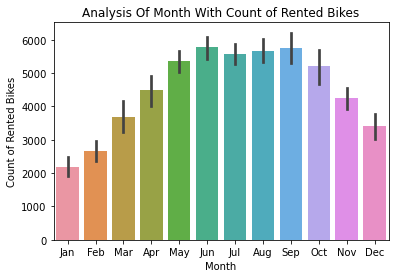

In [12]:
## Month Analysis

univariateAnalysis('mnth','Analysis Of Month With Count of Rented Bikes','Month','Count of Rented Bikes')

   > Looking at the above results, it can be seen that <b>Jun to Sep are the peak Months</b> with highest Rented Bikes

            cnt
weekday        
Sat      487790
Fri      485395
Sun      477807
Thr      471214
Wed      469109
Tue      455503
Mon      444027


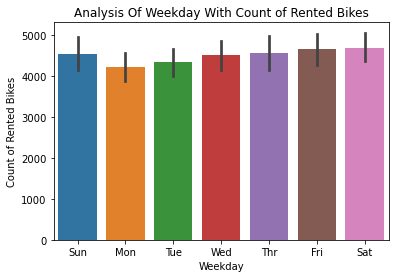

In [13]:
## Weekday Analysis
univariateAnalysis('weekday','Analysis Of Weekday With Count of Rented Bikes','Weekday','Count of Rented Bikes')

   > Looking at the results above, it can be seen that the no of Bikes bieng Rented are almost same across all days. (Only Weekends seem bit extra)

          cnt
yr           
2019  2047742
2018  1243103


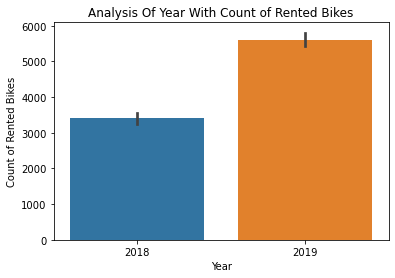

In [14]:
## Year Analysis
univariateAnalysis('yr','Analysis Of Year With Count of Rented Bikes','Year','Count of Rented Bikes')

   > Looking at above results, it can be seen that the Bike Rental was done more in <b>Year 2019</b>

                   cnt
weathersit            
Clear          2257952
Mist + Cloudy   995024
Light Shower     37869


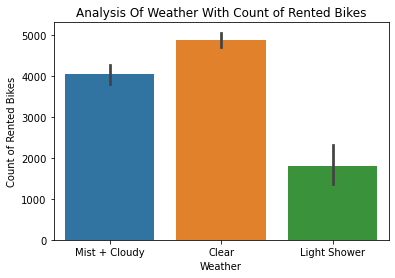

In [15]:
## Weather Analysis
univariateAnalysis('weathersit','Analysis Of Weather With Count of Rented Bikes','Weather','Count of Rented Bikes')

   > Looking at above results, it can be seen that Bikes Renting is done mostly in <b>Clear Weather</b> Conditions

                     cnt
workingday              
Working Day      2290576
Non-Working Day  1000269


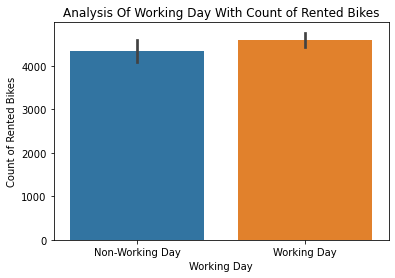

In [16]:
## Working Day Analysis
univariateAnalysis('workingday','Analysis Of Working Day With Count of Rented Bikes','Working Day','Count of Rented Bikes')

   > Looking at above results, it can be seen that the Bikes are rented more on <b>Working Day</b>

                 cnt
holiday             
Non-Holiday  3212410
Holiday        78435


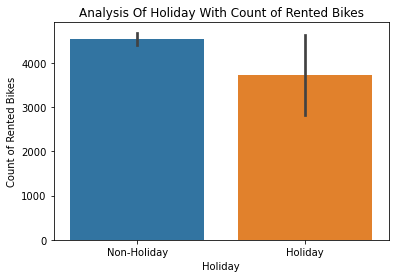

In [17]:
## Holiday Analysis
univariateAnalysis('holiday','Analysis Of Holiday With Count of Rented Bikes','Holiday','Count of Rented Bikes')

   > Looking at above result, it can be seen that more Bikes are Rented on <b>Non-Holiday</b> days

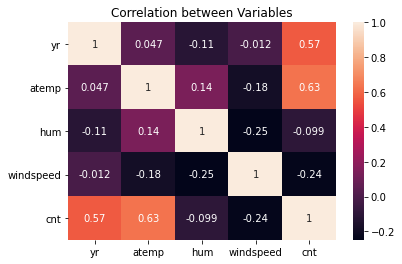

In [18]:
## Visulizing the correlation amoung all th variables

#Heatmap to see correlation between variables

sns.heatmap(bikes.corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

#### Create a Model to select the best fit line, thereby selecting the best features for the bikes bieng rented

In [19]:
##Creating dummy variables for the categorical columns so that it can be used for finding the Best Fit Line


## dummy variables for season
seasons = pd.get_dummies(bikes['season'])
print("Seasons : \n", seasons.head())

## dummy variables for yr
years = pd.get_dummies(bikes['yr'])
print("Years : \n", years.head())

## dummy variables for month
months = pd.get_dummies(bikes['mnth'])
print("Months : \n", months.head())

## dummy variables for weekday
weekdays = pd.get_dummies(bikes['weekday'])
print("Weekdays : \n", weekdays.head())

## dummy variables for workingday
workingdays = pd.get_dummies(bikes['workingday'])
print("WorkingDays : \n", workingdays.head())

## dummy variables for holiday
holidays = pd.get_dummies(bikes['holiday'])
print("Holidays : \n", holidays.head())

## dummy variables for weathersit
weather = pd.get_dummies(bikes['weathersit'])
print("Weather : \n", weather.head())

Seasons : 
    fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0
Years : 
    2018  2019
0     1     0
1     1     0
2     1     0
3     1     0
4     1     0
Months : 
    Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    1    0    0    0    0    0    0    0
Weekdays : 
    Fri  Mon  Sat  Sun  Thr  Tue  Wed
0    0    0    0    1    0    0    0
1    0    1    0    0    0    0    0
2    0    0    0    0    0    1    0
3    0    0    0    0    0    0    1
4    0    0    0    0    1    0    0
WorkingDays : 
    Non-Working Day  Working Day
0                1            0
1   

In [20]:
## Creating a copy of main data to preserve the actual state
bikes_new = bikes[['season','yr','mnth','weekday','holiday','workingday','weathersit','atemp','hum','windspeed','cnt']].copy() 
bikes_new.head()

,season,yr,mnth,weekday,holiday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Sun,Non-Holiday,Non-Working Day,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Mon,Non-Holiday,Non-Working Day,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Tue,Non-Holiday,Working Day,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Wed,Non-Holiday,Working Day,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Thr,Non-Holiday,Working Day,Clear,11.46350,43.6957,12.522300,1600


In [21]:
## Appending the dummy variables to the newly created newly created data

###Seasons Dummies
bikes_new = pd.concat([bikes_new,seasons], axis=1)
bikes_new = bikes_new.drop('season', axis=1)

###Years Dummies
bikes_new = pd.concat([bikes_new,years], axis=1)
bikes_new = bikes_new.drop('yr', axis=1)

###Month Dummies
bikes_new = pd.concat([bikes_new,months], axis=1)
bikes_new = bikes_new.drop('mnth', axis=1)

## Weekday Dumies
bikes_new = pd.concat([bikes_new,weekdays], axis=1)
bikes_new = bikes_new.drop('weekday', axis=1)

###WorkingDays Dummies
bikes_new = pd.concat([bikes_new,workingdays], axis=1)
bikes_new = bikes_new.drop('workingday', axis=1)

###Holidays Dummies
bikes_new = pd.concat([bikes_new,holidays], axis=1)
bikes_new = bikes_new.drop('holiday', axis=1)

## Weather Dumies
bikes_new = pd.concat([bikes_new,weather], axis=1)
bikes_new = bikes_new.drop('weathersit', axis=1)

bikes_new.head()

,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2018,2019,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
0,18.18125,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,17.68695,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,9.47025,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
3,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0


In [22]:
### Checking the newly created column data
bikes_new.describe()

,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2018,2019,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849,0.257534,0.246575,0.252055,0.243836,0.500000,0.500000,...,0.141096,0.143836,0.142466,0.316438,0.683562,0.028767,0.971233,0.634247,0.028767,0.336986
std,8.150308,14.237589,5.195841,1936.011647,0.437576,0.431313,0.434490,0.429689,0.500343,0.500343,...,0.348359,0.351164,0.349767,0.465405,0.465405,0.167266,0.167266,0.481971,0.167266,0.473004
min,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All columns are numerical and can now be used to Create a Model using Linear Regression

In [23]:
### Import libraries for model creation

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
## Creating Train and Test Data Set

bikes_train_data, bikes_test_data = train_test_split(bikes_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bikes_train_data.shape)
print(bikes_test_data.shape)

(510, 36)
(219, 36)


In [25]:
## Scaling of the numerical column values (except dummy variables and target variable cnt)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = ['atemp', 'hum', 'windspeed','cnt']

bikes_train_data[numerical_cols] = scaler.fit_transform(bikes_train_data[numerical_cols])

bikes_train_data.head()

,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2018,2019,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
653,0.501133,0.575354,0.300794,0.864243,0,0,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
576,0.766351,0.725633,0.264686,0.827658,1,0,0,0,0,1,...,0,0,1,0,1,0,1,1,0,0
426,0.438975,0.640189,0.255342,0.465255,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
728,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
482,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [26]:
bikes_train_data.describe()

,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2018,2019,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620,0.262745,0.243137,0.245098,0.24902,0.492157,0.507843,...,0.158824,0.150980,0.131373,0.323529,0.676471,0.025490,0.974510,0.627451,0.029412,0.343137
std,0.212385,0.145882,0.169797,0.224593,0.440557,0.429398,0.430568,0.43287,0.500429,0.500429,...,0.365870,0.358381,0.338139,0.468282,0.468282,0.157763,0.157763,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
## Getting values in terms of X and Y for getting the best fit line linear regression model

y_train = bikes_train_data.pop('cnt')
x_train = bikes_train_data

In [28]:
print(y_train.head())
print(x_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
        atemp       hum  windspeed  fall  spring  summer  winter  2018  2019  \
653  0.501133  0.575354   0.300794     0       0       0       1     0     1   
576  0.766351  0.725633   0.264686     1       0       0       0     0     1   
426  0.438975  0.640189   0.255342     0       1       0       0     0     1   
728  0.200348  0.498067   0.663106     0       1       0       0     0     1   
482  0.391735  0.504508   0.188475     0       0       1       0     0     1   

     Apr  ...  Thr  Tue  Wed  Non-Working Day  Working Day  Holiday  \
653    0  ...    0    0    1                0            1        0   
576    0  ...    0    0    1                0            1        0   
426    0  ...    0    0    0                1            0        0   
728    0  ...    0    0    0                1            0        0   
482    1  ...    0    0    0                1            0

In [29]:
## Getting the Best Features Using Recursive Feature Elimination Alogorithm (RFE) 
lm = LinearRegression()
lm.fit(x_train, y_train)

## Selecting 15 features at start
rfe = RFE(lm, 15)             
rfe = rfe.fit(x_train, y_train)

In [37]:
## Listing the features that are selected by RFE algo

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('atemp', False, 19),
 ('hum', False, 21),
 ('windspeed', False, 20),
 ('fall', False, 5),
 ('spring', False, 18),
 ('summer', False, 17),
 ('winter', True, 1),
 (2018, True, 1),
 (2019, True, 1),
 ('Apr', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Fri', False, 16),
 ('Mon', False, 3),
 ('Sat', False, 14),
 ('Sun', False, 7),
 ('Thr', False, 15),
 ('Tue', False, 11),
 ('Wed', False, 13),
 ('Non-Working Day', False, 12),
 ('Working Day', False, 8),
 ('Holiday', False, 2),
 ('Non-Holiday', False, 6),
 ('Clear', True, 1),
 ('Light Shower', True, 1),
 ('Mist + Cloudy', False, 4)]

In [30]:
x_train.columns[rfe.support_]

Index([      'winter',           2018,           2019,          'Apr',
                'Aug',          'Dec',          'Feb',          'Jan',
                'Jul',          'Jun',          'May',          'Nov',
                'Sep',        'Clear', 'Light Shower'],
      dtype='object')

In [31]:
## Creating Methods to build the model and get metrics using Oridinary Linear Square Algo

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [33]:
## checking the R squared, Adj. R Squared metrics using Oridinary Linear Square (OLS)

##columns selected by RFE
column_selected_rfe = x_train.columns[rfe.support_]

### features selected by rfe will form x co-ordinate
x_train_rfe = x_train[column_selected_rfe]

x_train_rfe = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.75e-159
Time:                        14:38:19   Log-Likelihood:                 441.10
No. Observations:                 510   AIC:                            -852.2
Df Residuals:                     495   BIC:                            -788.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2550      0.010     25.986   

In [34]:
## Checking VIF for the RFE selected features
x_train_rfe = x_train_rfe.drop(['const'], axis=1)
checkVIF(x_train_rfe)

,Features,VIF
1,2018,5.52
0,winter,2.43
4,Aug,1.64
11,Nov,1.64
7,Jan,1.59
10,May,1.57
3,Apr,1.53
8,Jul,1.52
9,Jun,1.51
6,Feb,1.45


#### Due to high p-value of 2018 Feature and high VIF, null hypothesis for this is rejected and hence it can be dropped

In [35]:
x_train_rfe = x_train_rfe.drop([2018], axis=1)

In [36]:
x_train_rfe = build_model(x_train_rfe,y_train)
x_train_rfe = x_train_rfe.drop(['const'], axis=1)
checkVIF(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.75e-159
Time:                        14:38:45   Log-Likelihood:                 441.10
No. Observations:                 510   AIC:                            -852.2
Df Residuals:                     495   BIC:                            -788.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2599      0.015     16.949   

,Features,VIF
0,winter,2.43
10,Nov,1.76
4,Dec,1.39
7,Jul,1.25
3,Aug,1.23
8,Jun,1.23
2,Apr,1.20
6,Jan,1.16
5,Feb,1.15
9,May,1.14


### The p-value for all the features is 0 and the VIF is also below 5 for all features. 
### This model also has R Square as 0.794 and Adjusted R Squared Value as 0.788 which signifies the model provides about 79% accuracy. 
### This is our best model. 
### Let's now do Residual Analysis to check our error terms are normally distributed 

<Figure size 432x288 with 0 Axes>

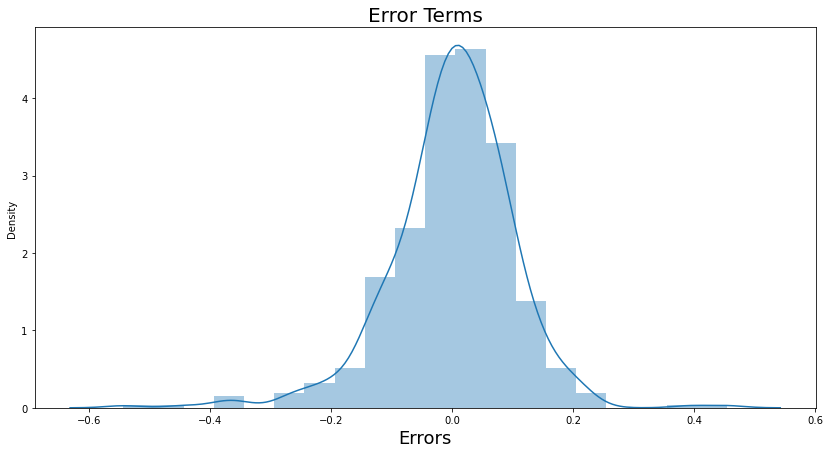

In [37]:
##Checking predicted values on our model

### Our Final Model
x_train_rfe = sm.add_constant(x_train_rfe) #Adding the constant
final_model = sm.OLS(y_train,x_train_rfe).fit()

## Getting predicted values of y
y_train_pred = final_model.predict(x_train_rfe)
x_train_rfe = x_train_rfe.drop(['const'], axis=1)

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

> From this graph, we can see that our error terms are normally distributed

#### Let's perform some tests on our test data

In [38]:
## Transforming the test values
#Create a list of numeric variables
numeric_cols=['atemp', 'hum', 'windspeed','cnt']

#Fit on data
bikes_test_data[numeric_cols] = scaler.transform(bikes_test_data[numeric_cols])
bikes_test_data.head()

,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2018,2019,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
184,0.769660,0.657364,0.084219,0.692706,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
535,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,0
299,0.496145,0.837699,0.334206,0.303382,0,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
221,0.795343,0.437098,0.339570,0.547400,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
152,0.741471,0.314298,0.537414,0.569029,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0


In [40]:
#Dividing into X_test_data and y_test_data
y_test_data = bikes_test_data.pop('cnt')
x_test_data = bikes_test_data
x_test_data.describe()

,atemp,hum,windspeed,fall,spring,summer,winter,2018,2019,Apr,...,Thr,Tue,Wed,Non-Working Day,Working Day,Holiday,Non-Holiday,Clear,Light Shower,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.246575,0.255708,0.264840,0.232877,0.520548,0.479452,0.091324,...,0.100457,0.127854,0.164384,0.301370,0.698630,0.036530,0.963470,0.652968,0.027397,0.319635
std,0.217888,0.148974,0.159947,0.432005,0.437258,0.442259,0.423633,0.500722,0.500722,0.288730,...,0.301297,0.334692,0.371472,0.459904,0.459904,0.188034,0.188034,0.477117,0.163612,0.467403
min,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.714132,0.743928,0.403048,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
## Use Final_model to make predictions
x_test_1 = x_test_data[x_train_rfe.columns]
x_test_1 = sm.add_constant(x_test_1)
y_test_pred = final_model.predict(x_test_1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [42]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test_data,y_test_pred)

0.7878976207612222

In [43]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.787897)*(14-1)/(14-1-1)
print(Adj_r2)

0.7702217499999999


#### Model Evaluation

Text(0, 0.5, 'y_test_pred')

<Figure size 432x288 with 0 Axes>

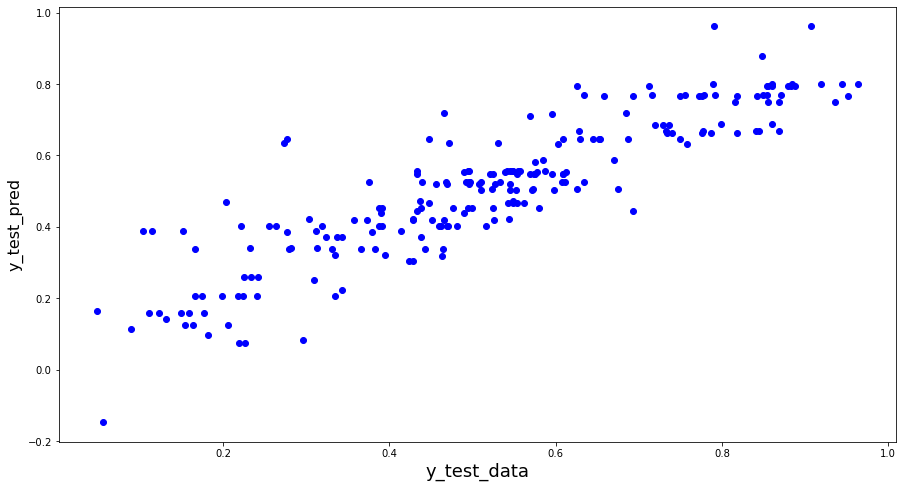

In [44]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test_data,y_test_pred,color='blue')
fig.suptitle('y_test_data vs y_test_pred', fontsize=20)
plt.xlabel('y_test_data', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16) 

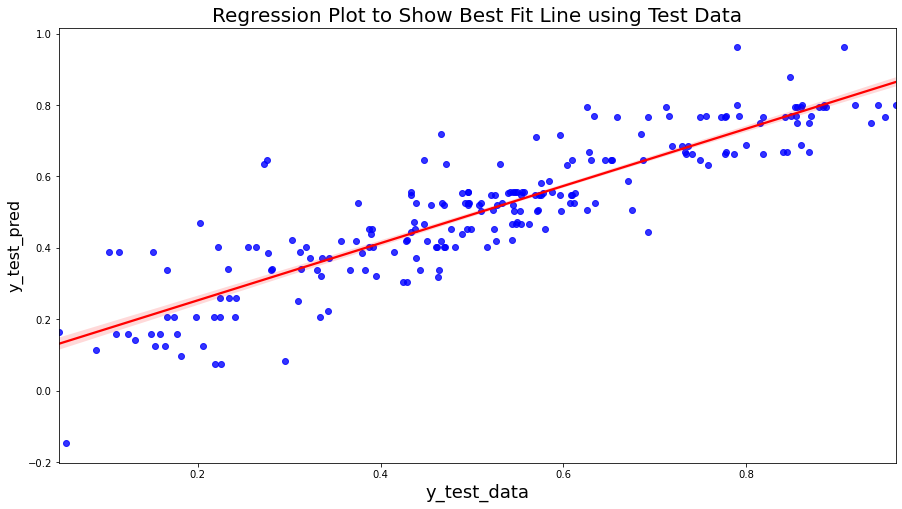

In [95]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test_data, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Regression Plot to Show Best Fit Line using Test Data', fontsize=20)
plt.xlabel('y_test_data', fontsize=18)                        
plt.ylabel('y_test_pred', fontsize=16)                          
plt.show()

> Looking from the graphs above, we can see that the predicted values(y_test_predicted) and actual values(y_test_data) are almost the same